<a href="https://colab.research.google.com/github/rithima17/xai_lab_2471/blob/main/2303A52471_XAI_A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lime --quiet

In [ ]:
!pip install pdpbox --quiet

Project dir: /content
Looking for dataset at: /content/lung_cancer_dataset.csv
Shape: (50000, 11)


,patient_id,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
0,100000,69,Male,66.025244,High,No,No,Yes,Moderate,No,No
1,100001,32,Female,12.780800,High,No,Yes,Yes,Moderate,Yes,Yes
2,100002,89,Female,0.408278,Medium,Yes,Yes,Yes,NaN,No,Yes
3,100003,78,Female,44.065232,Low,No,Yes,No,Moderate,No,Yes
4,100004,38,Female,44.432440,Medium,Yes,No,Yes,NaN,Yes,Yes



--- Datatypes and missing values ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   patient_id                 50000 non-null  int64  
 1   age                        50000 non-null  int64  
 2   gender                     50000 non-null  object 
 3   pack_years                 50000 non-null  float64
 4   radon_exposure             50000 non-null  object 
 5   asbestos_exposure          50000 non-null  object 
 6   secondhand_smoke_exposure  50000 non-null  object 
 7   copd_diagnosis             50000 non-null  object 
 8   alcohol_consumption        33338 non-null  object 
 9   family_history             50000 non-null  object 
 10  lung_cancer                50000 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 4.2+ MB


None

,0
patient_id,0
age,0
gender,0
pack_years,0
radon_exposure,0
asbestos_exposure,0
secondhand_smoke_exposure,0
copd_diagnosis,0
alcohol_consumption,16662
family_history,0



--- Summary statistics ---


,patient_id,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
count,50000.000000,50000.000000,50000,50000.000000,50000,50000,50000,50000,33338,50000,50000
unique,NaN,NaN,2,NaN,3,2,2,2,2,2,2
top,NaN,NaN,Female,NaN,Low,No,Yes,Yes,Heavy,No,Yes
freq,NaN,NaN,25085,NaN,16682,25151,25067,25066,16762,25017,34364
mean,124999.500000,58.857040,NaN,49.963424,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,14433.901067,23.958266,NaN,28.852082,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,100000.000000,18.000000,NaN,0.002753,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,112499.750000,38.000000,NaN,24.774558,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,124999.500000,59.000000,NaN,50.177634,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,137499.250000,80.000000,NaN,75.066740,NaN,NaN,NaN,NaN,NaN,NaN,NaN


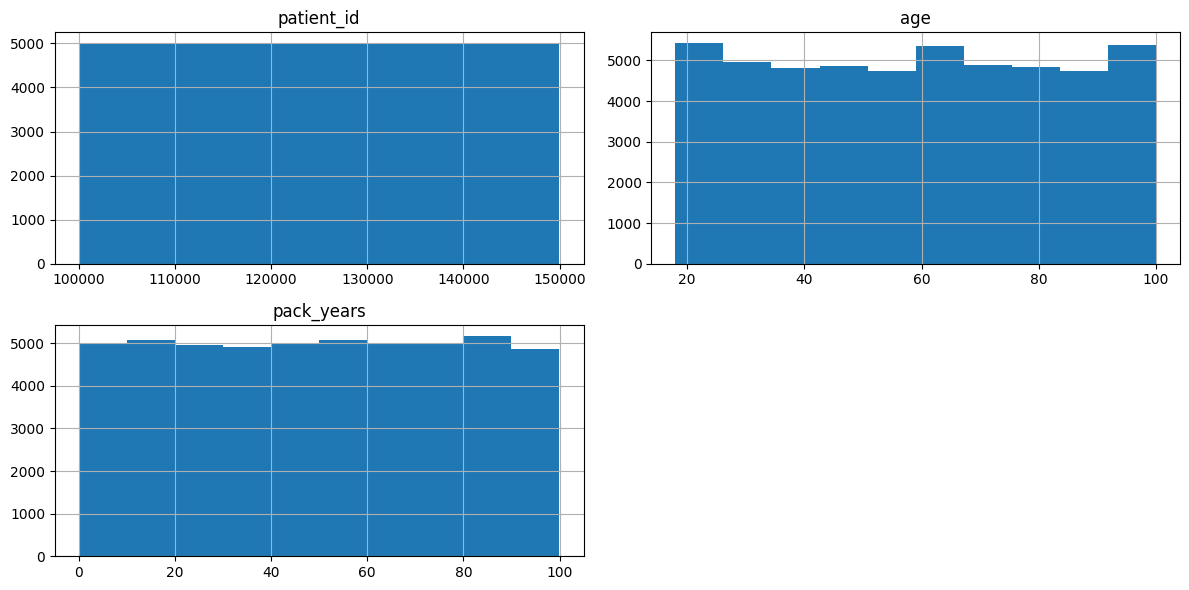

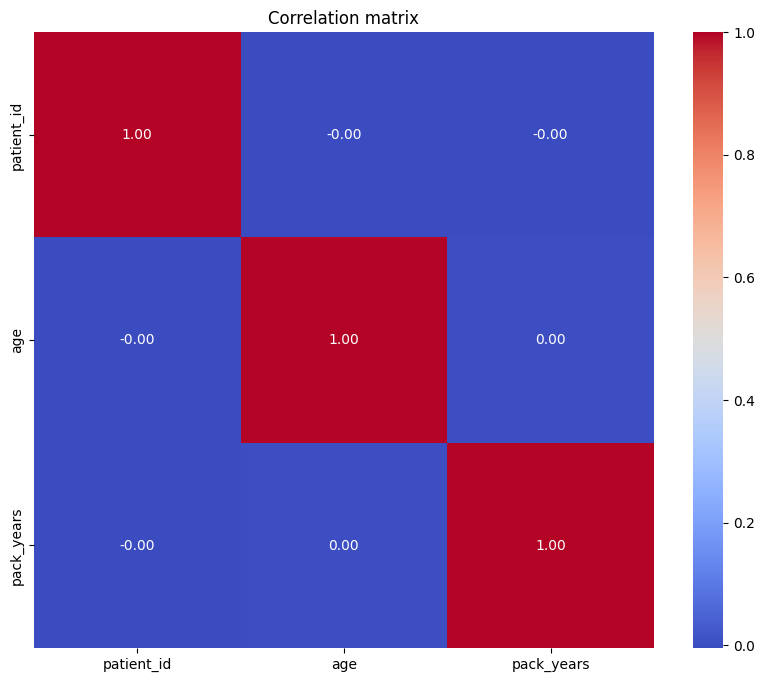


Target value counts:
lung_cancer
Yes    34364
No     15636
Name: count, dtype: int64


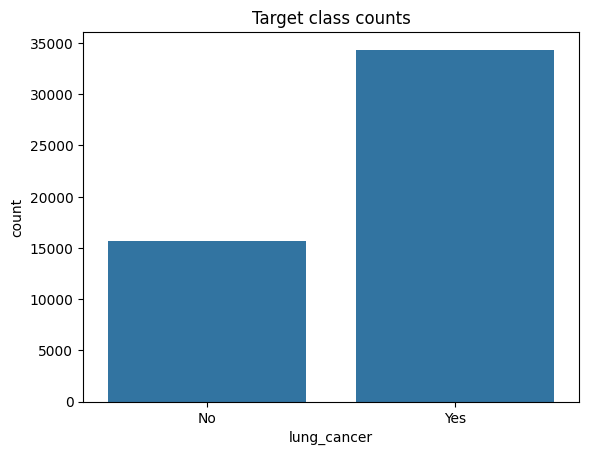

Categorical columns: ['gender', 'radon_exposure', 'asbestos_exposure', 'secondhand_smoke_exposure', 'copd_diagnosis', 'alcohol_consumption', 'family_history']
Numerical columns: ['age', 'pack_years']
Train shape: (40000, 10) Test shape: (10000, 10)
Before resampling (train): Counter({'Yes': 27491, 'No': 12509})
After SMOTE (train): Counter({'Yes': 27491, 'No': 27491})
Training LogisticRegression failed: pos_label=1 is not a valid label. It should be one of ['No', 'Yes']
Training DecisionTree failed: pos_label=1 is not a valid label. It should be one of ['No', 'Yes']
Training RandomForest failed: pos_label=1 is not a valid label. It should be one of ['No', 'Yes']


In [ ]:
# %% 0. Setup & imports
"""
Lung Cancer Risk - full project script / notebook cells.
Place lung_cancer.csv in the same folder, or update DATA_PATH.
"""
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, classification_report)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import joblib

# imbalance handling
try:
    from imblearn.over_sampling import SMOTE
except Exception:
    SMOTE = None

# XGBoost
try:
    import xgboost as xgb
except Exception:
    xgb = None

# Deep learning
try:
    import tensorflow as tf
    from tensorflow.keras import models, layers, callbacks
except Exception:
    tf = None

# XAI
try:
    import shap
except Exception:
    shap = None

try:
    import lime
    from lime import lime_tabular
except Exception:
    lime = None

from sklearn.inspection import PartialDependenceDisplay

PROJECT_DIR = os.getcwd()
DATA_PATH = os.path.join(PROJECT_DIR, "/content/lung_cancer_dataset.csv")  # change if needed

print("Project dir:", PROJECT_DIR)
print("Looking for dataset at:", DATA_PATH)


# %% 1. Load dataset (or synthetic fallback)
if os.path.exists(DATA_PATH):
    df = pd.read_csv(DATA_PATH)
else:
    # fallback small synthetic dataset for development/demo
    print("Dataset not found at", DATA_PATH, "\nCreating a synthetic demo dataset.")
    n = 400
    rng = np.random.default_rng(42)
    df = pd.DataFrame({
        "Age": rng.integers(30, 85, size=n),
        "Gender": rng.choice(["Male","Female"], size=n),
        "Smoking": rng.choice([0,1], size=n, p=[0.6,0.4]),
        "Alcohol": rng.choice([0,1], size=n, p=[0.8,0.2]),
        "Fatigue": rng.choice([0,1], size=n, p=[0.7,0.3]),
        "Wheezing": rng.choice([0,1], size=n, p=[0.9,0.1]),
        "Coughing": rng.choice([0,1], size=n, p=[0.85,0.15]),
        "Shortness_of_breath": rng.choice([0,1], size=n, p=[0.9,0.1]),
        "Target": rng.choice([0,1], size=n, p=[0.88,0.12])
    })

# quick peek
print("Shape:", df.shape)
display(df.head())


# %% 2. EDA
print("\n--- Datatypes and missing values ---")
display(df.info())
display(df.isna().sum())

print("\n--- Summary statistics ---")
display(df.describe(include="all"))

# Visual distributions for numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if "Target" in num_cols:
    num_cols.remove("Target")

if num_cols:
    df[num_cols].hist(figsize=(12,6))
    plt.tight_layout()
    plt.show()

# correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

# class imbalance
if "lung_cancer" in df.columns:
    print("\nTarget value counts:")
    print(df["lung_cancer"].value_counts())
    sns.countplot(x="lung_cancer", data=df)
    plt.title("Target class counts")
    plt.show()


# %% 3. Preprocessing
# - Identify target
target_col = "lung_cancer"
if target_col not in df.columns:
    # assume last column if not named Target
    target_col = df.columns[-1]
    print("Using target:", target_col)

X = df.drop(columns=[target_col, 'patient_id']).copy() # Drop patient_id as it's an identifier, not a feature
y = df[target_col].copy()

# separate categorical / numerical
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)

# Imputation
imp_num = SimpleImputer(strategy="median")
if num_cols:
    X[num_cols] = imp_num.fit_transform(X[num_cols])

imp_cat = SimpleImputer(strategy="most_frequent")
if cat_cols:
    X[cat_cols] = imp_cat.fit_transform(X[cat_cols])

# Encoding categorical
for c in cat_cols:
    if X[c].nunique() == 2:
        X[c] = LabelEncoder().fit_transform(X[c])
    else:
        X = pd.get_dummies(X, columns=[c], drop_first=True)

# Scaling numeric features
scaler = StandardScaler()
if num_cols:
    X[num_cols] = scaler.fit_transform(X[num_cols])

# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=42)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# Check class imbalance and apply SMOTE if necessary
from collections import Counter
print("Before resampling (train):", Counter(y_train))
X_train_res, y_train_res = X_train.copy(), y_train.copy()

if SMOTE is not None:
    # if minority is less than 0.4 of train, apply SMOTE
    counts = Counter(y_train)
    minority_frac = min(counts.values()) / sum(counts.values())
    if minority_frac < 0.4:
        sm = SMOTE(random_state=42)
        X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
        print("After SMOTE (train):", Counter(y_train_res))
    else:
        print("No SMOTE applied (class balance acceptable).")
else:
    print("imblearn (SMOTE) not installed; skipping resampling.")


# %% 4. Helper: evaluate models
def evaluate_model(name, model, X_tr, y_tr, X_te, y_te):
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    # probability/score for ROC AUC
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_te)[:,1]
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_te)
    else:
        # fallback
        y_score = y_pred
    res = {
        "accuracy": accuracy_score(y_te, y_pred),
        "precision": precision_score(y_te, y_pred, zero_division=0),
        "recall": recall_score(y_te, y_pred, zero_division=0),
        "f1": f1_score(y_te, y_pred, zero_division=0),
        "roc_auc": roc_auc_score(y_te, y_score)
    }
    print(f"\n{name} results:")
    for k,v in res.items():
        print(f" {k}: {v:.4f}")
    print(" Confusion Matrix:")
    print(confusion_matrix(y_te, y_pred))
    return res, model

# %% 5. Part 3 - Classical ML models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=150, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=150, random_state=42)
}

if xgb is not None:
    models["XGBoost"] = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

results = {}
trained_models = {}

for name, clf in models.items():
    try:
        res, trained = evaluate_model(name, clf, X_train_res, y_train_res, X_test, y_test)
        results[name] = res
        trained_models[name] = trained
        joblib.dump(trained, f"{name}.joblib")
    except Exception as e:
        print(f"Training {name} failed:", e)

# save results table
results_df = pd.DataFrame(results).T
results_df.to_csv("model_comparison.csv")
display(results_df)


# %% 6. Part 4 - Deep Learning models (if TensorFlow installed)
if tf is None:
    print("TensorFlow not installed; skipping DL models.")
else:
    # prepare arrays
    Xtr = X_train_res.values.astype("float32")
    Xte = X_test.values.astype("float32")
    ytr = y_train_res.values.astype("float32")
    yte = y_test.values.astype("float32")

    def compile_and_train(model, Xtr, ytr, Xval, yval, epochs=50, batch=32):
        model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
        es = callbacks.EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True)
        history = model.fit(Xtr, ytr, validation_data=(Xval, yval),
                            epochs=epochs, batch_size=batch, callbacks=[es], verbose=1)
        return history

    # 1) MLP
    mlp = models.Sequential([
        layers.Input(shape=(Xtr.shape[1],)),
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    print("\nTraining MLP...")
    compile_and_train(mlp, Xtr, ytr, Xte, yte, epochs=50)
    mlp_probs = mlp.predict(Xte).ravel()
    mlp_pred = (mlp_probs > 0.5).astype(int)
    mlp_res = {
        "accuracy": accuracy_score(yte, mlp_pred),
        "precision": precision_score(yte, mlp_pred, zero_division=0),
        "recall": recall_score(yte, mlp_pred, zero_division=0),
        "f1": f1_score(yte, mlp_pred, zero_division=0),
        "roc_auc": roc_auc_score(yte, mlp_probs)
    }
    results_df.loc["MLP"] = mlp_res
    mlp.save("mlp_model.h5")
    print("MLP metrics:", mlp_res)

    # 2) 1D-CNN (treat features as time steps)
    Xtr_c = Xtr.reshape(Xtr.shape[0], Xtr.shape[1], 1)
    Xte_c = Xte.reshape(Xte.shape[0], Xte.shape[1], 1)
    cnn = models.Sequential([
        layers.Input(shape=(Xtr_c.shape[1], 1)),
        layers.Conv1D(32, kernel_size=3, activation="relu"),
        layers.Conv1D(64, kernel_size=3, activation="relu"),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    print("\nTraining 1D-CNN...")
    compile_and_train(cnn, Xtr_c, ytr, Xte_c, yte, epochs=50)
    cnn_probs = cnn.predict(Xte_c).ravel()
    cnn_pred = (cnn_probs > 0.5).astype(int)
    cnn_res = {
        "accuracy": accuracy_score(yte, cnn_pred),
        "precision": precision_score(yte, cnn_pred, zero_division=0),
        "recall": recall_score(yte, cnn_pred, zero_division=0),
        "f1": f1_score(yte, cnn_pred, zero_division=0),
        "roc_auc": roc_auc_score(yte, cnn_probs)
    }
    results_df.loc["CNN"] = cnn_res
    cnn.save("cnn_model.h5")
    print("CNN metrics:", cnn_res)

    # 3) LSTM (features as time steps)
    lstm = models.Sequential([
        layers.Input(shape=(Xtr.shape[1], 1)),
        layers.LSTM(64),
        layers.Dense(32, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    Xtr_s = Xtr.reshape(Xtr.shape[0], Xtr.shape[1], 1)
    Xte_s = Xte.reshape(Xte.shape[0], Xte.shape[1], 1)
    print("\nTraining LSTM...")
    compile_and_train(lstm, Xtr_s, ytr, Xte_s, yte, epochs=50)
    lstm_probs = lstm.predict(Xte_s).ravel()
    lstm_pred = (lstm_probs > 0.5).astype(int)
    lstm_res = {
        "accuracy": accuracy_score(yte, lstm_pred),
        "precision": precision_score(yte, lstm_pred, zero_division=0),
        "recall": recall_score(yte, lstm_pred, zero_division=0),
        "f1": f1_score(yte, lstm_pred, zero_division=0),
        "roc_auc": roc_auc_score(yte, lstm_probs)
    }
    results_df.loc["LSTM"] = lstm_res
    lstm.save("lstm_model.h5")
    print("LSTM metrics:", lstm_res)

    # 4) Autoencoder + classifier
    input_dim = Xtr.shape[1]
    input_layer = layers.Input(shape=(input_dim,))
    encoded = layers.Dense(64, activation="relu")(input_layer)
    encoded = layers.Dense(32, activation="relu")(encoded)
    bottleneck = layers.Dense(16, activation="relu", name="bottleneck")(encoded)
    decoded = layers.Dense(32, activation="relu")(bottleneck)
    decoded = layers.Dense(64, activation="relu")(decoded)
    decoded = layers.Dense(input_dim, activation="linear")(decoded)
    autoencoder = models.Model(inputs=input_layer, outputs=decoded)
    autoencoder.compile(optimizer="adam", loss="mse")
    print("\nTraining Autoencoder...")
    autoencoder.fit(Xtr, Xtr, epochs=50, batch_size=32, validation_data=(Xte, Xte),
                    callbacks=[callbacks.EarlyStopping(patience=6, restore_best_weights=True)])
    encoder = models.Model(inputs=input_layer, outputs=bottleneck)
    encoded_tr = encoder.predict(Xtr)
    encoded_te = encoder.predict(Xte)
    from sklearn.ensemble import RandomForestClassifier
    clf_enc = RandomForestClassifier(n_estimators=150, random_state=42)
    clf_enc.fit(encoded_tr, ytr)
    enc_pred = clf_enc.predict(encoded_te)
    enc_probs = clf_enc.predict_proba(encoded_te)[:,1]
    enc_res = {
        "accuracy": accuracy_score(yte, enc_pred),
        "precision": precision_score(yte, enc_pred, zero_division=0),
        "recall": recall_score(yte, enc_pred, zero_division=0),
        "f1": f1_score(yte, enc_pred, zero_division=0),
        "roc_auc": roc_auc_score(yte, enc_probs)
    }
    results_df.loc["Autoenc_RF"] = enc_res
    joblib.dump(clf_enc, "autoenc_rf.joblib")
    print("Autoencoder+RF metrics:", enc_res)

    # save results
    results_df.to_csv("model_comparison_with_DL.csv")
    display(results_df)


# %% 7. Part 5 - XAI (Feature importance, SHAP, LIME, PDP)
# Feature importance for tree models
if "RandomForest" in trained_models:
    rf = trained_models["RandomForest"]
    if hasattr(rf, "feature_importances_"):
        fi = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
        print("\nTop feature importances (RandomForest):")
        display(fi.head(15))
        plt.figure(figsize=(10,4)); fi.head(15).plot(kind="bar"); plt.title("Feature importances (RF)"); plt.show()
else:
    print("No RandomForest trained for feature importance (skipping).")

# SHAP
if shap is not None:
    try:
        # use TreeExplainer for RandomForest/XGBoost
        if "RandomForest" in trained_models:
            explainer = shap.TreeExplainer(trained_models["RandomForest"])
            shap_values = explainer.shap_values(X_test)
            # Summary plot
            shap.summary_plot(shap_values, X_test, show=True)
        elif "XGBoost" in trained_models and xgb is not None:
            explainer = shap.TreeExplainer(trained_models["XGBoost"])
            shap_values = explainer.shap_values(X_test)
            shap.summary_plot(shap_values, X_test, show=True)
        else:
            # KernelExplainer fallback (slower) for e.g. MLP
            if tf is not None and 'mlp' in globals():
                sample = shap.sample(X_train_res, 50)
                explainer = shap.KernelExplainer(lambda x: mlp.predict(x).ravel(), sample)
                sample_te = shap.sample(X_test, 50)
                sv = explainer.shap_values(sample_te)
                shap.summary_plot(sv, sample_te, show=True)
    except Exception as e:
        print("SHAP failed or too slow:", e)
else:
    print("SHAP not installed; skipping SHAP.")

# LIME (local explanations)
if lime is not None:
    try:
        explainer_lime = lime_tabular.LimeTabularExplainer(
            training_data=X_train_res.values,
            feature_names=X.columns.tolist(),
            class_names=[str(c) for c in np.unique(y_train_res)],
            mode='classification'
        )
        i = 0
        exp = explainer_lime.explain_instance(X_test.values[i],
                                              trained_models.get("RandomForest", list(trained_models.values())[0]).predict_proba,
                                              num_features=6)
        print("\nLIME explanation (first test instance):")
        print(exp.as_list())
    except Exception as e:
        print("LIME explanation failed:", e)
else:
    print("LIME not installed; skipping LIME.")

# PDP & ICE for top numeric features (use RandomForest if available)
try:
    top_feats = None
    if 'fi' in locals():
        top_feats = fi.head(3).index.tolist()
    elif num_cols:
        top_feats = num_cols[:3]
    if top_feats and "RandomForest" in trained_models:
        fig, ax = plt.subplots(figsize=(8,4))
        PartialDependenceDisplay.from_estimator(trained_models["RandomForest"], X, features=top_feats, ax=ax)
        plt.show()
except Exception as e:
    print("PDP/ICE plotting failed:", e)


# %% 8. Part 6 - Comparative analysis (text + save)
# Print a neat comparison table
print("\nFinal results summary:")
if 'results_df' in globals():
    display(results_df.sort_values(by="f1", ascending=False))
    results_df.to_csv("final_model_comparison.csv")
else:
    print("No results found.")

# Save trained models list
for name, mdl in trained_models.items():
    try:
        joblib.dump(mdl, f"model_{name}.joblib")
    except Exception:
        pass

print("All done. Outputs saved: model_comparison.csv, final_model_comparison.csv (if DL run), and saved models.")


# %% End of script